In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.shape

(768, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
# Visualize distributions
numerical_cols = df.columns[:-1]

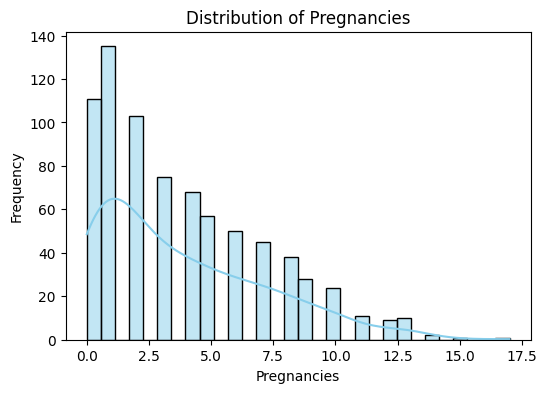

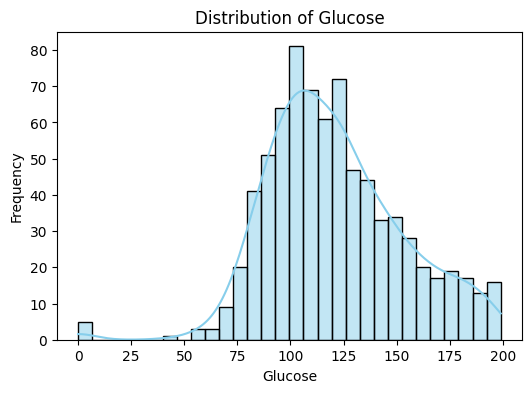

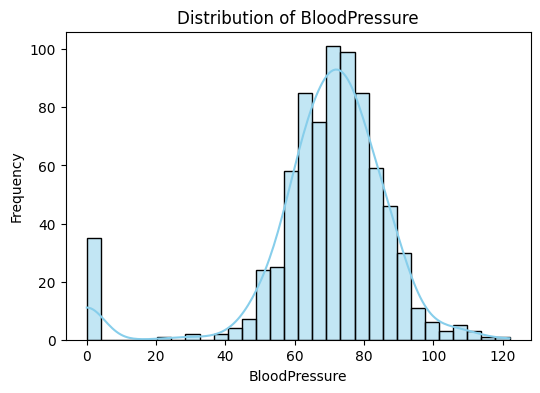

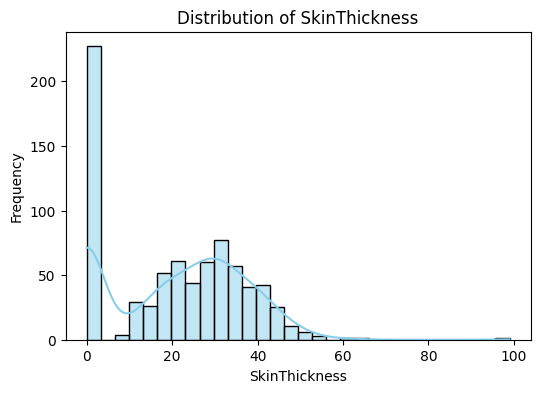

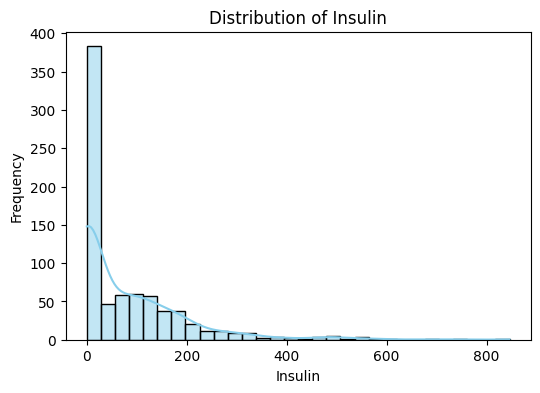

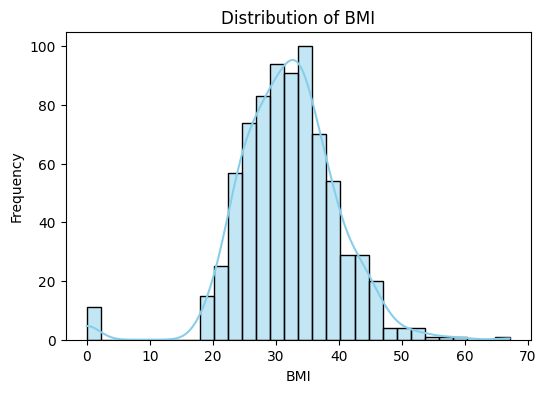

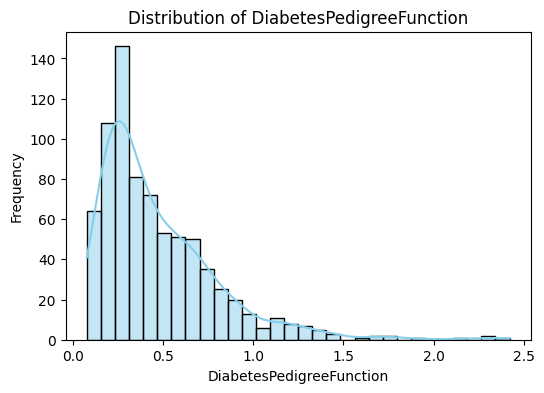

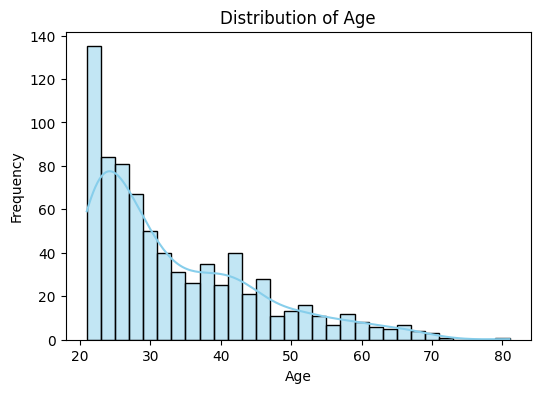

In [9]:
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, color='skyblue', bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

<Axes: >

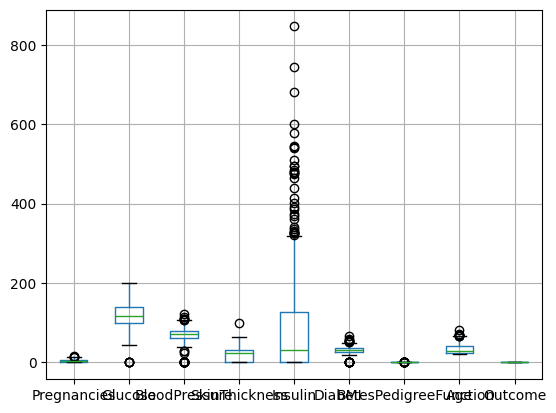

In [10]:
df.boxplot()

In [11]:
### outlier capping
def outlier_capping(df,column):
    Q1= df[column].quantile(0.25)
    Q3= df[column].quantile(0.75)
    IQR= Q3-Q1
    lower_extreme= Q1-1.5*IQR
    upper_extreme= Q3+1.5*IQR
    df[column]= df[column].apply(lambda x: lower_extreme if x<lower_extreme else upper_extreme if x>upper_extreme else x)
for col in df.select_dtypes(['int','float']).columns:
    outlier_capping(df,col)

<Axes: >

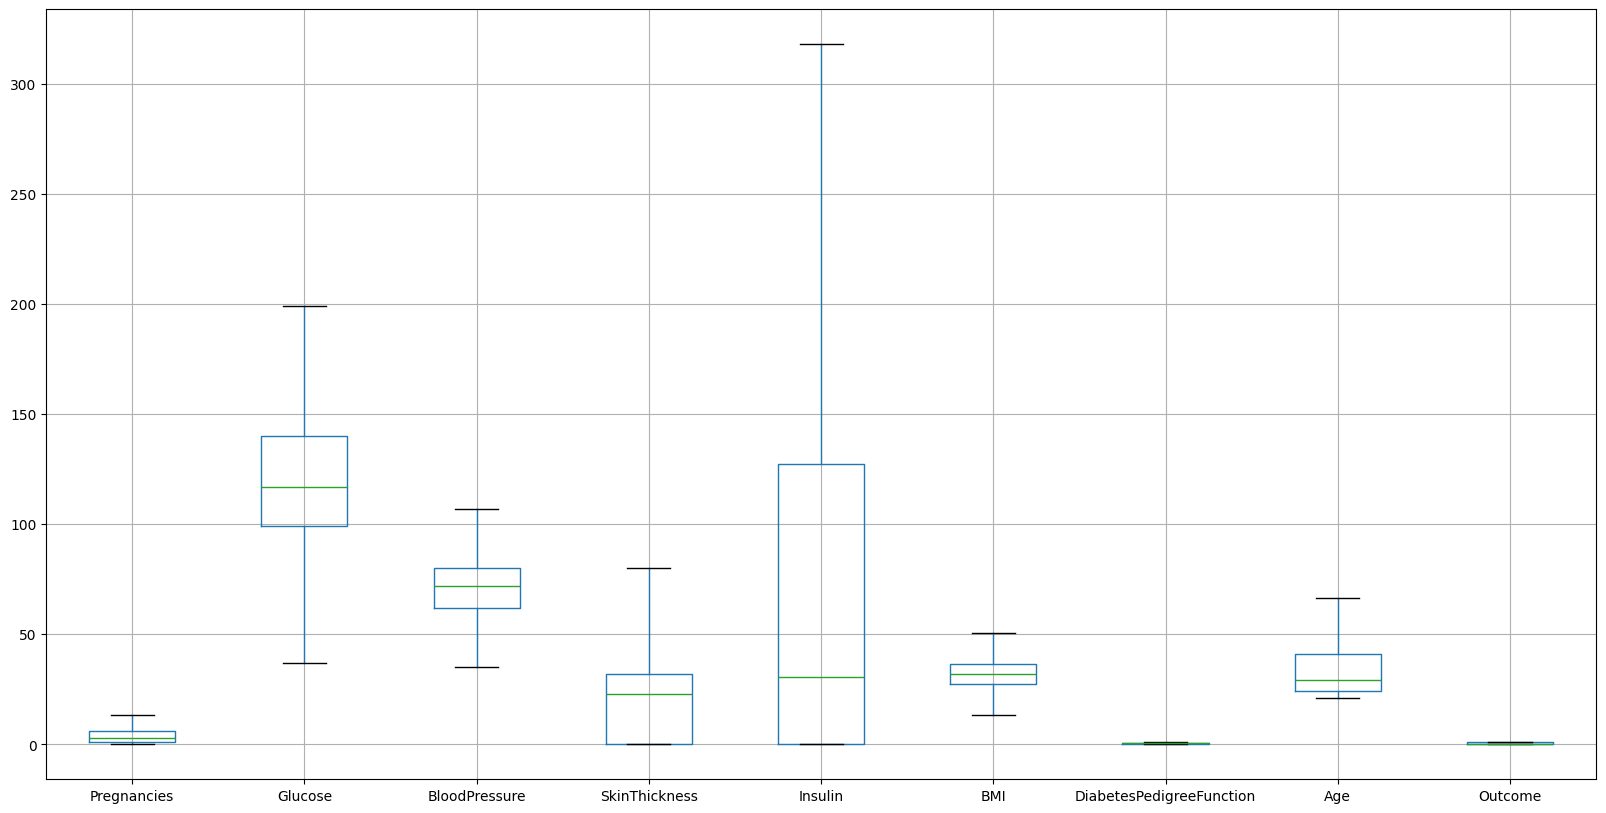

In [12]:
df.boxplot(figsize=(20,10))

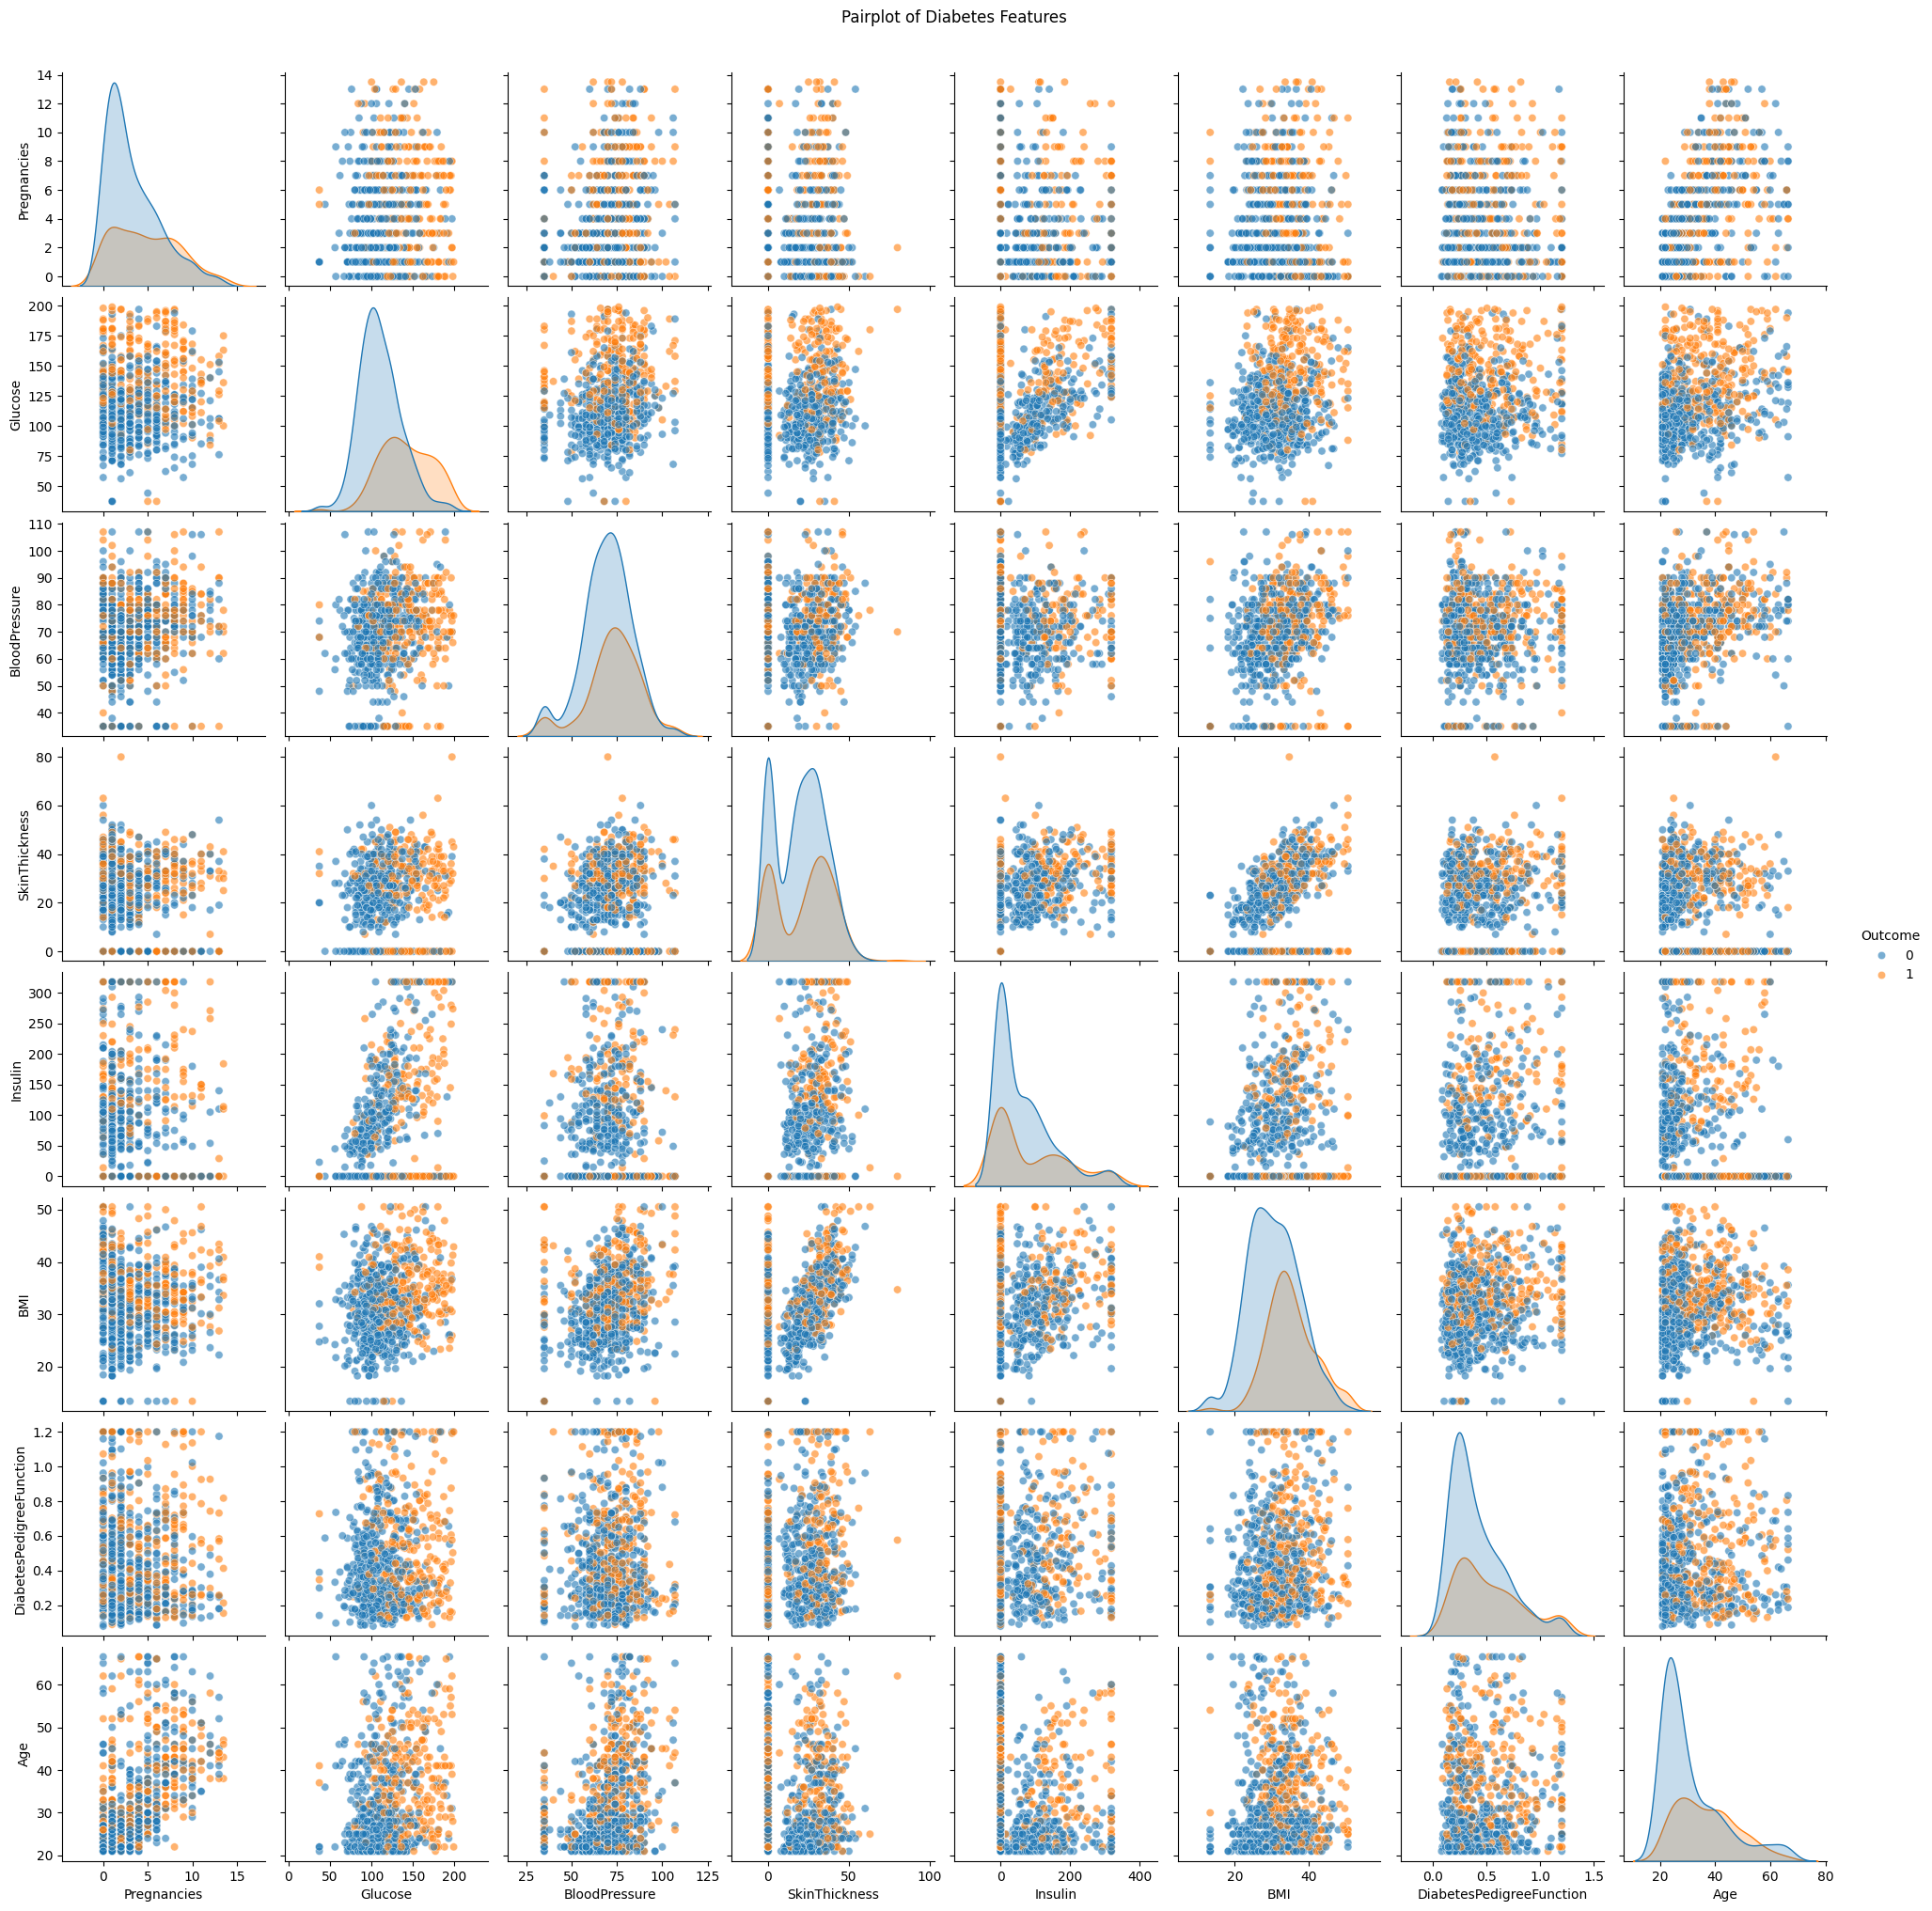

In [13]:
# Pairplot to visualize relationships (with Outcome as hue)
sns.pairplot(df, hue='Outcome', diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle("Pairplot of Diabetes Features", y=1.02)
plt.show()

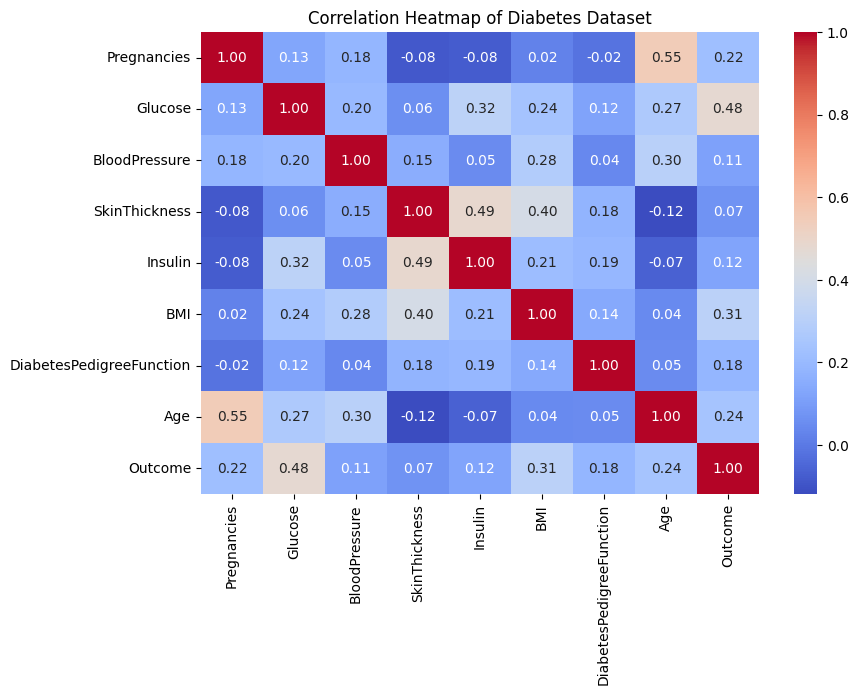

In [14]:
# Correlation heatmap
plt.figure(figsize=(9,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Diabetes Dataset")
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [16]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,1.200,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,1


In [17]:
# no missing values found

In [18]:
# Split features and target
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [20]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
X_train.shape

(614, 8)

In [22]:
X_test.shape

(154, 8)

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [25]:
# Predict
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:,1]

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
# Build and train the model
model = LogisticRegression(max_iter=1000, solver='liblinear', random_state=42)
model.fit(X_train_scaled, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [28]:
# Predictions
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]


In [29]:
y_pred

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0])

In [30]:
y_pred_proba

array([0.61895373, 0.10594466, 0.27678059, 0.30314606, 0.00766451,
       0.20558417, 0.47408051, 0.93627506, 0.09725311, 0.79708763,
       0.28076253, 0.58233183, 0.1131481 , 0.09890026, 0.31227888,
       0.35651893, 0.70093248, 0.08582724, 0.78812413, 0.17645257,
       0.15378936, 0.78236718, 0.1784567 , 0.94298657, 0.55042089,
       0.01763738, 0.59011161, 0.04817219, 0.33723252, 0.03651034,
       0.04464022, 0.0448441 , 0.47727983, 0.63159582, 0.8716123 ,
       0.13848046, 0.32329745, 0.06881666, 0.77093745, 0.58783125,
       0.28940486, 0.11391045, 0.10031442, 0.29808446, 0.16459648,
       0.41685669, 0.15741539, 0.11751665, 0.62405947, 0.43821945,
       0.65349005, 0.80469254, 0.37438663, 0.06784402, 0.50246025,
       0.40545627, 0.787747  , 0.26213085, 0.75636727, 0.13449168,
       0.78757624, 0.22980448, 0.01152632, 0.89488044, 0.03666459,
       0.15421567, 0.92666448, 0.02048197, 0.28646164, 0.68128479,
       0.17395155, 0.0868572 , 0.3317506 , 0.49766641, 0.03922

In [31]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,roc_auc_score, roc_curve)

In [32]:
# Compute metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

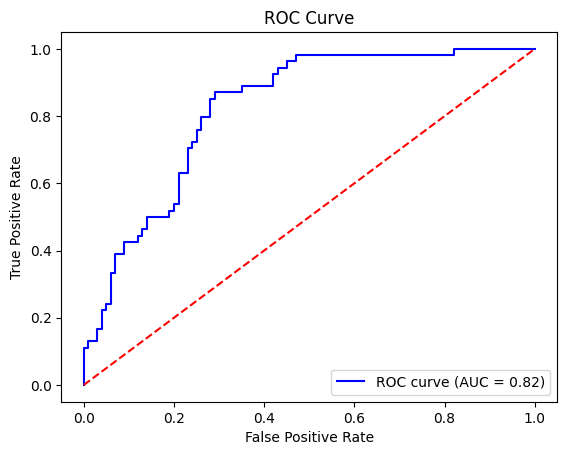

In [33]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1],[0,1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [34]:
# STEP 5: INTERPRETATION
coefficients = pd.DataFrame({'Feature': X.columns,'Coefficient': model.coef_[0]})
coefficients['Odds Ratio'] = np.exp(coefficients['Coefficient'])
coefficients.sort_values(by='Odds Ratio', ascending=False)

,Feature,Coefficient,Odds Ratio
1,Glucose,1.150377,3.159383
5,BMI,0.715176,2.044546
0,Pregnancies,0.367126,1.443580
6,DiabetesPedigreeFunction,0.302127,1.352733
7,Age,0.183638,1.201581
3,SkinThickness,0.026740,1.027100
4,Insulin,-0.121632,0.885474
2,BloodPressure,-0.148315,0.862160


In [35]:
# STEP 6: DEPLOYMENT USING STREAMLIT
import streamlit as st
import numpy as np
import pickle

In [36]:
pickle.dump(model, open('logreg_model.pkl', 'wb'))
pickle.dump(scaler, open('scaler.pkl', 'wb'))

In [37]:
# Load model and scaler
model = pickle.load(open('logreg_model.pkl', 'rb'))
scaler = pickle.load(open('scaler.pkl', 'rb'))

In [38]:
# User inputs
pregnancies = st.number_input("Pregnancies", min_value=0, max_value=20, step=1)
glucose = st.number_input("Glucose Level", min_value=0.0, step=1.0)
blood_pressure = st.number_input("Blood Pressure (mm Hg)", min_value=0.0, step=1.0)
skin_thickness = st.number_input("Skin Thickness (mm)", min_value=0.0, step=1.0)
insulin = st.number_input("Insulin Level (mu U/ml)", min_value=0.0, step=1.0)
bmi = st.number_input("BMI", min_value=0.0, step=0.1)
dpf = st.number_input("Diabetes Pedigree Function", min_value=0.0, step=0.01)
age = st.slider("Age", 1, 100, 30)

2025-12-18 15:04:25.358 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-18 15:04:25.359 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-18 15:04:25.360 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-18 15:04:25.361 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-18 15:04:25.361 WARNING streamlit.runtime.state.session_state_proxy: Session state does not function when running a script without `streamlit run`
2025-12-18 15:04:25.362 WARNING streamlit.runtime.scriptrunner_utils.script_run_c

In [39]:
# Convert input to array
input_data = np.array([[pregnancies, glucose, blood_pressure, skin_thickness, insulin, bmi, dpf, age]])
input_scaled = scaler.transform(input_data)

In [40]:
# Prediction
if st.button("Predict"):
    prob = model.predict_proba(input_scaled)[0][1]
    result = " Diabetic" if prob > 0.5 else " Non-Diabetic"
    
    st.subheader(f"Prediction: {result}")
    st.write(f"**Probability of Diabetes:** {prob:.2f}")
    
    if prob > 0.5:
        st.warning("This person is likely diabetic. Please consult a doctor.")
    else:
        st.success(" This person is likely non-diabetic.")

2025-12-18 15:04:26.190 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-18 15:04:26.191 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-18 15:04:26.192 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-18 15:04:26.193 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-18 15:04:26.193 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-18 15:04:26.194 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


### Interview Questions:
1. What is the difference between precision and recall?
**Precision** and **Recall** are two important metrics used to evaluate the performance of classification models, particularly when dealing with imbalanced datasets. Both metrics focus on how well a model identifies the positive class, but they measure different aspects of performance.

**Precision**-When the model says 'positive', how often is it correct? It focuses on the quality of positive predictions.


**Recall** All actual positives, how many did the model find? It focuses on the model's ability to capture the positive class.


2. What is cross-validation, and why is it important in binary classification?
-> Cross-validation is a technique where you split your data multiple times into different training and testing sets to evaluate a model’s performance more reliably.

Cross-validation gives a more reliable performance score by testing on multiple data splits.It prevents your good results from being just luck from one specific split.If one class is rare, cross-validation ensures every fold includes both classes.It helps stop overfitting by making sure the model works well on different data, not just one training set.


